In [31]:
'''Exercise 3: Predict whether or not a passenger survived based on the attributes provided in the titanic.csv dataset'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

train_data = pd.read_csv('downloads/titanic/train.csv')
test_data = pd.read_csv('downloads/titanic/test.csv')

train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]

test_data["AgeBucket"] = test_data["Age"] // 15 * 15
test_data["RelativesOnboard"] = test_data["SibSp"] + test_data["Parch"]

train_data.set_index("PassengerId")
test_data.set_index("PassengerId")

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

num_cols = ['Age', 'SibSp', 'Parch', 'Fare']

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("cat_encoder", OneHotEncoder(sparse_output=False))
])

cat_cols = ['Pclass', 'Sex', 'Embarked', 'AgeBucket', 'RelativesOnboard']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

X_train = full_pipeline.fit_transform(train_data[num_cols + cat_cols])
y_train = train_data['Survived']

X_test = full_pipeline.fit_transform(test_data[num_cols + cat_cols])

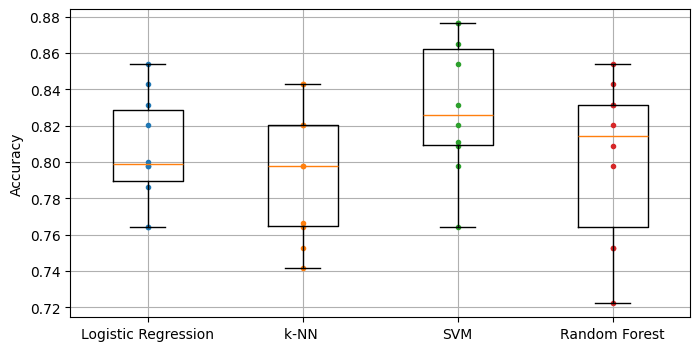

In [32]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=10)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score = cross_val_score(knn, X_train, y_train, cv=10)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_score = cross_val_score(svc, X_train, y_train, cv=10)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_score = cross_val_score(rfc, X_train, y_train, cv=10)

plt.figure(figsize=(8, 4))
plt.plot([1]*10, log_reg_score, ".")
plt.plot([2]*10, knn_score, ".")
plt.plot([3]*10, svc_score, ".")
plt.plot([4]*10, rfc_score, ".")
plt.boxplot([log_reg_score, knn_score, svc_score, rfc_score], labels=("Logistic Regression","k-NN ","SVM","Random Forest"))
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [33]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_train)
n_correct = sum(y_pred == y_train)
print(f'Accuracy(%): {(n_correct / len(y_pred))*100}')

Accuracy(%): 83.61391694725027


In [35]:
predictions = svc.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# Save the DataFrame to a CSV file
submission.to_csv('titanic_kaggle_submission.csv', index=False)

submission.shape

(418, 2)